# Analiza wpływu elementów wyniku badania mikroskopowego nowotworu piersi na model diagnozujący złośliwość, za pomocą metody SHAP

Na podstawie: [Using SHAP values for interpretability](https://www.kaggle.com/code/diegovicente/using-shap-values-for-interpretability)

Z wykorzystaniem datasetu: [Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)

# Importowanie bibliotek

In [130]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import KFold
import shap
shap.initjs()

# Odczyt danych

In [131]:
data = pd.read_csv('../input/data.csv')
data['benign'] = (data.diagnosis == 'M').astype(int)

In [132]:
data.drop(['id', 'diagnosis'], axis=1, inplace=True)
features = [c for c in data.columns if c != 'benign']
kfolds = KFold()

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:426: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


In [133]:
for train_idx, test_idx in kfolds.split(data[features]):
    x_train, y_train = data[features].iloc[train_idx], data['benign'].iloc[train_idx]
    x_test, y_test = data[features].iloc[test_idx], data['benign'].iloc[test_idx]
    
    param['scale_pos_weight'] = (y_train.size - y_train.sum()) / y_train.sum()    
    
    x_train = xgb.DMatrix(x_train.values, feature_names=features, label=y_train.values)
    x_test = xgb.DMatrix(x_test.values, feature_names=features, label=y_test.values)

# Trenowanie modelu

In [134]:
param = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'silent': 1,
    'nthreads': 2,
    'scale_pos_weight' : (y_train.size - y_train.sum()) / y_train.sum(),
}

model = xgb.train(param, x_train, 10, [(x_train, 'train'), (x_test, 'test')])

[0]	train-auc:0.993199	test-auc:0.949108
[1]	train-auc:0.999131	test-auc:0.979611
[2]	train-auc:0.999579	test-auc:0.98224
[3]	train-auc:0.999804	test-auc:0.986222
[4]	train-auc:0.999916	test-auc:0.985425
[5]	train-auc:1	test-auc:0.987735
[6]	train-auc:1	test-auc:0.989328
[7]	train-auc:1	test-auc:0.989646
[8]	train-auc:1	test-auc:0.990284
[9]	train-auc:1	test-auc:0.991558


# Metoda SHAP

In [135]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(data[features])

# Globalny wpływ elementów na wyniki modelu

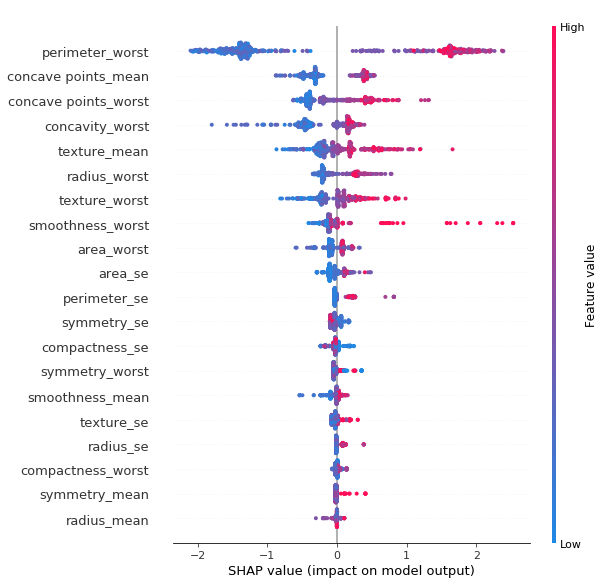

In [136]:
shap.summary_plot(shap_values, data[features]) 

# Wpływ poszczególnych właściwości na pojedynczy wynik

In [137]:
shap.force_plot(explainer.expected_value, shap_values[29,:], data[features].iloc[29,:])